### 2022年度プログラミング演習A・B

# 第9回レポート課題の解説

### 演習1

ヤコビ法のアルゴリズムを実現するコードを書き、

$$
A=
\begin{pmatrix}
2 & -1 & 0 & 0\\
-1 & 2 & -1 & 0\\
0 & -1 & 2 & -1\\
0 & 0 & -1 & 2
\end{pmatrix}
,\quad b=
\begin{pmatrix}
1\\
1\\
1\\
1
\end{pmatrix}
$$

に対して $Ax=b$ の近似解を求めてください。ただし、

$$
x^{(0)}=
\begin{pmatrix}
0\\
0\\
0\\
0
\end{pmatrix}
,\quad EPS=10^{-5},\quad K=100
$$

とします。

In [1]:
A = [2,-1,0,0; -1,2,-1,0; 0,-1,2,-1; 0,0,-1,2];
b = [1;1;1;1];
EPS = 1E-5;
K = 100;
x = [0;0;0;0];

n = size(A,1);
k = 0;
x_new = zeros(n,1);

while norm(b-A*x,Inf) >= EPS && k <= K
    for i = 1:n
        tmp = b(i);
        for j = 1:i-1
            tmp = tmp-A(i,j)*x(j);
        end
        for j = i+1:n
            tmp = tmp-A(i,j)*x(j);
        end
        x_new(i) = tmp/A(i,i);  %x(i)の値を上書きしないよう、x_new(i)に値を格納する
    end
    x = x_new;  %for文が終わりxの各成分の値が不要になった段階で、xをx_newで更新する
    k = k+1;
end

if k > K
    printf("%d回の反復では、近似解を求めることができなかった。\n",K)
else
    printf("%d回の反復で、次の近似解を求めることができた。\n",k)
    printf("%.15f\n",x)
end

56回の反復で、次の近似解を求めることができた。
1.999986722814732
2.999978517062961
2.999978517062961
1.999986722814732


### 演習2

ガウス・ザイデル法のアルゴリズムを実現するコードを書き、

$$
A=
\begin{pmatrix}
2 & -1 & 0 & 0\\
-1 & 2 & -1 & 0\\
0 & -1 & 2 & -1\\
0 & 0 & -1 & 2
\end{pmatrix}
,\quad b=
\begin{pmatrix}
1\\
1\\
1\\
1
\end{pmatrix}
$$

に対して $Ax=b$ の近似解を求めてください。ただし、

$$
x^{(0)}=
\begin{pmatrix}
0\\
0\\
0\\
0
\end{pmatrix}
,\quad EPS=10^{-5},\quad K=100
$$

とします。

In [2]:
A = [2,-1,0,0; -1,2,-1,0; 0,-1,2,-1; 0,0,-1,2];
b = [1;1;1;1];
EPS = 1E-5;
K = 100;
x = [0;0;0;0];

n = size(A,1);
k = 0;

while norm(b-A*x,Inf) >= EPS && k <= K
    for i = 1:n
        tmp = b(i);
        for j = 1:i-1
            tmp = tmp-A(i,j)*x(j);
        end
        for j = i+1:n
            tmp = tmp-A(i,j)*x(j);
        end
        x(i) = tmp/A(i,i);  %x(i)の値を上書きし、for文の残りの計算でその新しい値を使う
    end
    k = k+1;
end

if k > K
    printf("%d回の反復では、近似解を求めることができなかった。\n",K)
else
    printf("%d回の反復で、次の近似解を求めることができた。\n",k)
    printf("%.15f\n",x)
end

29回の反復で、次の近似解を求めることができた。
1.999986494169295
2.999982320638084
2.999985697095760
1.999992848547880


### 演習3（オプション）

ヤコビ法とガウス・ザイデル法による収束の様子を可視化して確認します。

連立一次方程式

$$
\left\{
\begin{matrix}
2x_1-x_2 = 1\\
x_1+2x_2 = 3
\end{matrix}
\right.
$$

における各方程式が表す直線のグラフ（ただし、範囲は $0\leq x_1\leq 1.4$）と、

$$
A=
\begin{pmatrix}
2 & -1\\
1 & 2
\end{pmatrix}
,\quad b=
\begin{pmatrix}
1\\
3
\end{pmatrix},
$$

$$
x^{(0)}=
\begin{pmatrix}
0\\
0
\end{pmatrix}
,\quad EPS=10^{-2},\quad K=100
$$

に対してヤコビ法を適用して得られるベクトル列 $\left\{x^{(k)}\right\}$ の各項が表す点を、一つの図に描画してください。

同様の描画を、ガウス・ザイデル法についても行ってください（つまり、結果は二つの図になります）。

さらに、描画した二つの図について自由に考察してください。

9回の反復で、次の近似解を求めることができた。
0.998046875000000
1.001953125000000


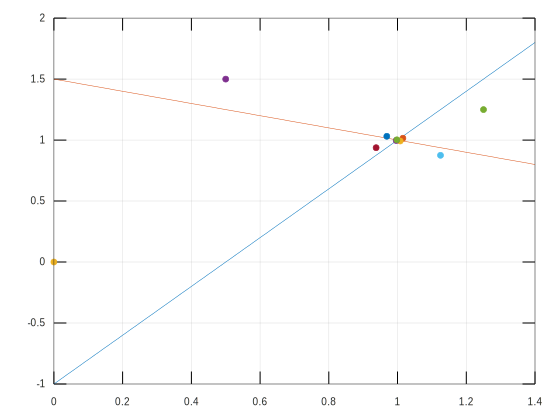

In [3]:
%plot --format svg
%上の行はコメントではなく、図をきれいにする（ベクター画像にする）ためのもの

x_list = 0:0.01:1.4;
y1_list = 2*x_list-1;     %一つ目の方程式に対応する直線の式
y2_list = -x_list/2+3/2;  %二つ目の方程式に対応する直線の式

plot(x_list,y1_list)  %一つ目の直線の描画
grid on               %グリッド線の表示
hold on               %複数のplotを行うために必要
plot(x_list,y2_list)  %二つ目の直線の描画

%ヤコビ法
A = [2,-1; 1,2];
b = [1;3];
EPS = 1E-2;
K = 100;
x = [0;0];

plot(x(1),x(2))  %初期値ベクトルの点の描画

n = size(A,1);
k = 0;
x_new = zeros(n,1);

while norm(b-A*x,Inf) >= EPS && k <= K
    for i = 1:n
        tmp = b(i);
        for j = 1:i-1
            tmp = tmp-A(i,j)*x(j);
        end
        for j = i+1:n
            tmp = tmp-A(i,j)*x(j);
        end
        x_new(i) = tmp/A(i,i);
    end
    x = x_new;
    plot(x(1),x(2))  %新たに計算したベクトルの点の描画
    k = k+1;
end

if k > K
    printf("%d回の反復では、近似解を求めることができなかった。\n",K)
else
    printf("%d回の反復で、次の近似解を求めることができた。\n",k)
    printf("%.15f\n",x)
end

5回の反復で、次の近似解を求めることができた。
0.998046875000000
1.000976562500000


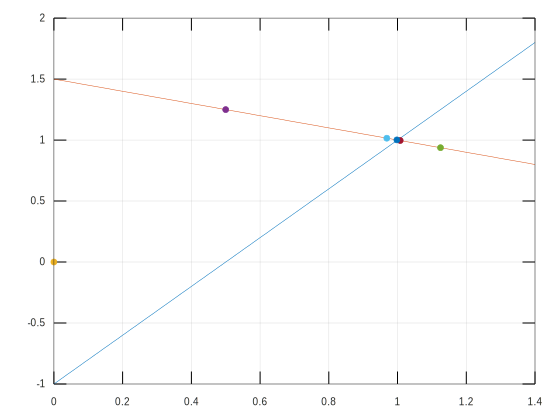

In [4]:
%plot --format svg
%上の行はコメントではなく、図をきれいにする（ベクター画像にする）ためのもの

x_list = 0:0.01:1.4;
y1_list = 2*x_list-1;     %一つ目の方程式に対応する直線の式
y2_list = -x_list/2+3/2;  %二つ目の方程式に対応する直線の式

plot(x_list,y1_list)  %一つ目の直線の描画
grid on               %グリッド線の表示
hold on               %複数のplotを行うために必要
plot(x_list,y2_list)  %二つ目の直線の描画

%ガウス・ザイデル法
A = [2,-1; 1,2];
b = [1;3];
EPS = 1E-2;
K = 100;
x = [0;0];

plot(x(1),x(2))  %初期値ベクトルの点の描画

n = size(A,1);
k = 0;

while norm(b-A*x,Inf) >= EPS && k <= K
    for i = 1:n
        tmp = b(i);
        for j = 1:i-1
            tmp = tmp-A(i,j)*x(j);
        end
        for j = i+1:n
            tmp = tmp-A(i,j)*x(j);
        end
        x(i) = tmp/A(i,i);
    end
    plot(x(1),x(2))  %新たに計算したベクトルの点の描画
    k = k+1;
end

if k > K
    printf("%d回の反復では、近似解を求めることができなかった。\n",K)
else
    printf("%d回の反復で、次の近似解を求めることができた。\n",k)
    printf("%.15f\n",x)
end

### （考察）

考えている連立一次方程式に対するヤコビ法の漸化式は

$$
\left\{
\begin{matrix}
x^{(k)}_1=\frac{1}{2}x^{(k-1)}_2+\frac{1}{2}\\
x^{(k)}_2=-\frac{1}{2}x^{(k-1)}_1+\frac{3}{2}
\end{matrix}
\right.
$$

であり、これは上の図で言うと初期値の点からスタートして、青い直線にぶつかるまで水平に、オレンジの直線にぶつかるまで鉛直にそれぞれ移動した座標の組が新たな点となることを表している。


考えている連立一次方程式に対するガウス・ザイデル法の漸化式は

$$
\left\{
\begin{matrix}
x^{(k)}_1=\frac{1}{2}x^{(k-1)}_2+\frac{1}{2}\\
x^{(k)}_2=-\frac{1}{2}x^{(k)}_1+\frac{3}{2}
\end{matrix}
\right.
$$

であり、これは上の図で言うと初期値の点からスタートして、青い直線にぶつかるまで水平に移動した後に、さらにオレンジの直線にぶつかるまで鉛直に移動した点が新たな点となることを表している。

ガウス・ザイデル法における初期値以外の点はオレンジの直線上に位置し、ヤコビ法と比較して直線の交点に到達するまでの動きの無駄が少ない、すなわち収束が速いことが分かる。